     Sepal length  Sepal width       Species
0             5.1          3.5     I. setosa
1             4.9          3.0     I. setosa
2             4.7          3.2     I. setosa
3             4.6          3.1     I. setosa
4             5.0          3.6     I. setosa
..            ...          ...           ...
145           6.7          3.0  I. virginica
146           6.3          2.5  I. virginica
147           6.5          3.0  I. virginica
148           6.2          3.4  I. virginica
149           5.9          3.0  I. virginica

[150 rows x 3 columns]
['I. setosa' 'I. versicolor' 'I. virginica']


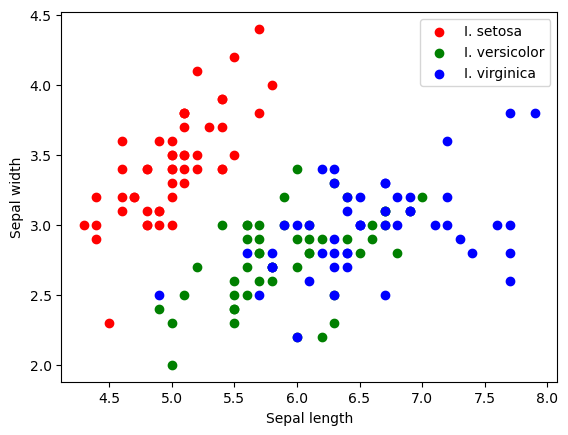

[(0, 'b'), (1, 'g'), (2, 'r')]


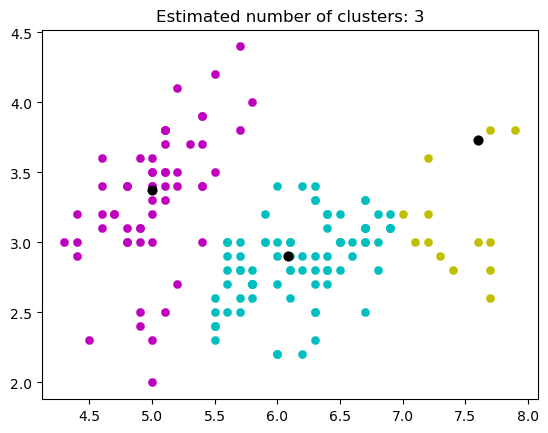

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth

df = pd.read_csv('iris_data.csv', decimal=',')

# Fjern de to kolonner, der ikke skal bruges i clusteringen
df = df.drop(columns=['Petal length', 'Petal width'])

print(df)


# Få en liste over unikke labels 
unique_labels = df['Species'].unique()

print(unique_labels)

# Set colors for each label
colors = ['r', 'g', 'b']

# Plot the scatter plot for each label
for i, label in enumerate(unique_labels):
    # Lav en ny DataFrame med kun de rækker, der tilhører den aktuelle label
    df_labeled = df[df['Species']== label]  
    # Plot Sepal længde på x-aksen og Sepal bredde på y-aksen og brug den aktuelle farve til at adskille labels
    plt.scatter(df_labeled['Sepal length'],df_labeled['Sepal width'],c=colors[i])

# Set axis labels and legend
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(unique_labels)

plt.show()

# Opdater DataFrame'en, så den kun indeholder Sepal længde og Sepal bredde
df = df[['Sepal length', 'Sepal width']]

# Estimer en bandwidth parameter til clusteringen
bandwidth = estimate_bandwidth(df, quantile=0.2)

# Lav en Mean Shift clustering-objekt med den estimerede bandwidth parameter
ms = MeanShift(bandwidth=bandwidth) #, bin_seeding=True) # can be used to speed up process, since fewer kernels are created.
ms.fit(df)

# Få labels (gruppe-ID'er) for hver observation i datasættet
labels = ms.labels_

# Få centrum for hver klynge i datasættet
cluster_centers = ms.cluster_centers_

# Få en liste over unikke labels (gruppe-ID'er)
labels_unique = np.unique(labels)

# Få antallet af klynger
n_clusters = len(labels_unique)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
print(list(zip(range(3),colors)))

# For hver klynge, plot observationspunkterne og klyngecentrum med de angivne farver
for k, col in zip(range(n_clusters), colors):
    # Få en boolsk maske, der angiver, hvilke observationer der tilhører den aktuelle klynge
    my_members = (labels == k)
    # Få centrum for den aktuelle klynge
    cluster_center = cluster_centers[k]
    
    # Få x- og y-koordinaterne for observationspunkterne, der tilhører den aktuelle klynge
    x, y = df["Sepal length"][my_members], df["Sepal width"][my_members]
    # Plottet observationspunkterne og klyngecentrum med de angivne farver
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))


plt.show()